In [16]:
from IPython.display import Video

# Display the video
video_path = r"C:\Users\KIIT0001\Downloads\53902-476396222_small.mp4"
Video(video_path, embed=True, width=600, height=400)

In [17]:
import cv2
import tensorflow as tf
import numpy as np

def build_model():
    """Builds the CNN model."""
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(64, 64, 3)),  # Use Input layer as the first layer
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def preprocess_data(video_path):
    """Preprocesses the video frames."""
    cap = cv2.VideoCapture(video_path)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return frames

def train_model(video_path):
    """Trains the CNN model using the preprocessed video frames."""
    frames = preprocess_data(video_path)
    
    # Resize frames to (64, 64, 3)
    resized_frames = [cv2.resize(frame, (64, 64)) for frame in frames]
    
    # Normalize frames
    resized_frames = np.array(resized_frames) / 255.0

    # Generate dummy labels for illustration purposes; replace with actual labels
    num_samples = len(resized_frames)
    labels = [0, 1] * (num_samples // 2)
    
    # If num_samples is odd, add one more label to make lengths match
    if num_samples % 2 != 0:
        labels.append(0)
    
    labels = np.array(labels[:num_samples])

    # Ensure labels have the correct shape
    if len(labels.shape) == 1:
        labels = labels.reshape(-1, 1)
    
    # Check if the number of frames matches the number of labels
    if len(resized_frames) != len(labels):
        raise ValueError(f"Number of frames ({len(resized_frames)}) does not match number of labels ({len(labels)}).")

    model = build_model()
    
    # Train the model
    model.fit(resized_frames, labels, epochs=10, batch_size=32)
    
    # Save the model
    model.save('traffic_signal_model.h5')

# Example usage (for testing purposes):
video_path = r"C:\Users\KIIT0001\Downloads\53902-476396222_small.mp4"
train_model(video_path)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.4961 - loss: 0.8404
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4752 - loss: 0.7085 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4552 - loss: 0.6945 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.5474 - loss: 0.6926 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4606 - loss: 0.6934 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5070 - loss: 0.6926 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6061 - loss: 0.6927 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5282 - loss: 0.6918 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5843 - loss: 0.6912 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5826 - loss: 0.6902 


In [18]:
import cv2
import tensorflow as tf
import numpy as np

def build_model():
    """Builds the CNN model."""
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(64, 64, 3)),  # Use Input layer as the first layer
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')  # Change output layer to 3 classes for red, yellow, green
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def preprocess_data(video_path):
    """Preprocesses the video frames."""
    cap = cv2.VideoCapture(video_path)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return frames

def train_model(video_path):
    """Trains the CNN model using the preprocessed video frames."""
    frames = preprocess_data(video_path)
    
    # Resize frames to (64, 64, 3)
    resized_frames = [cv2.resize(frame, (64, 64)) for frame in frames]
    
    # Normalize frames
    resized_frames = np.array(resized_frames) / 255.0

    # Generate dummy labels for illustration purposes; replace with actual labels
    num_samples = len(resized_frames)
    labels = np.random.randint(0, 3, num_samples)  # Random labels for 3 classes
    
    # Ensure labels have the correct shape
    labels = np.array(labels)

    # Check if the number of frames matches the number of labels
    if len(resized_frames) != len(labels):
        raise ValueError(f"Number of frames ({len(resized_frames)}) does not match number of labels ({len(labels)}).")

    model = build_model()
    
    # Train the model
    model.fit(resized_frames, labels, epochs=10, batch_size=32)
    
    # Save the model
    model.save('traffic_signal_model.h5')

def load_model():
    """Loads the trained CNN model."""
    return tf.keras.models.load_model('traffic_signal_model.h5')

def detect_traffic_signal(video_path, model):
    """Detects traffic signals in the video frames using the trained model."""
    frames = preprocess_data(video_path)
    
    # Resize frames to (64, 64, 3)
    resized_frames = [cv2.resize(frame, (64, 64)) for frame in frames]
    
    # Normalize frames
    resized_frames = np.array(resized_frames) / 255.0

    # Predict the traffic signal for each frame
    predictions = model.predict(resized_frames)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Map numeric predictions to traffic signal classes
    signal_classes = {0: 'red', 1: 'yellow', 2: 'green'}
    detected_signals = [signal_classes[pred] for pred in predicted_classes]

    return detected_signals

# Example usage (for training purposes):
video_path = r"C:\Users\KIIT0001\Downloads\53902-476396222_small.mp4"
train_model(video_path)

# Example usage (for detection purposes):
model = load_model()
detected_signals = detect_traffic_signal(video_path, model)
print(detected_signals)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.3587 - loss: 1.1405
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4005 - loss: 1.0745 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.3765 - loss: 1.0751 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4382 - loss: 1.0613 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4407 - loss: 1.0423 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5682 - loss: 1.0382 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5705 - loss: 1.0394
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4258 - loss: 1.0373 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5135 - loss: 1.0004 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4688 - loss: 0.9716 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
['yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'yellow', 'red', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'red', 'red', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'red', 'yellow', 'yellow', 'red', 'red', 'red', 'red', 'y

In [19]:
import cv2
import tensorflow as tf
import numpy as np
import time

def build_model():
    """Builds the CNN model."""
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(64, 64, 3)),  # Use Input layer as the first layer
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')  # Change output layer to 3 classes for red, yellow, green
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def preprocess_data(video_path):
    """Preprocesses the video frames."""
    cap = cv2.VideoCapture(video_path)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return frames

def train_model(video_path):
    """Trains the CNN model using the preprocessed video frames."""
    frames = preprocess_data(video_path)
    
    # Resize frames to (64, 64, 3)
    resized_frames = [cv2.resize(frame, (64, 64)) for frame in frames]
    
    # Normalize frames
    resized_frames = np.array(resized_frames) / 255.0

    # Generate dummy labels for illustration purposes; replace with actual labels
    num_samples = len(resized_frames)
    labels = np.random.randint(0, 3, num_samples)  # Random labels for 3 classes
    
    # Ensure labels have the correct shape
    labels = np.array(labels)

    # Check if the number of frames matches the number of labels
    if len(resized_frames) != len(labels):
        raise ValueError(f"Number of frames ({len(resized_frames)}) does not match number of labels ({len(labels)}).")

    model = build_model()
    
    # Train the model
    model.fit(resized_frames, labels, epochs=10, batch_size=32)
    
    # Save the model
    model.save('traffic_signal_model.h5')

def load_model():
    """Loads the trained CNN model."""
    return tf.keras.models.load_model('traffic_signal_model.h5')

def detect_signal_intervals(video_path, model):
    """Detects traffic signals in the video frames using the trained model and calculates time intervals."""
    frames = preprocess_data(video_path)
    
    # Resize frames to (64, 64, 3)
    resized_frames = [cv2.resize(frame, (64, 64)) for frame in frames]
    
    # Normalize frames
    resized_frames = np.array(resized_frames) / 255.0

    # Predict the traffic signal for each frame
    predictions = model.predict(resized_frames)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Calculate time intervals for signal changes
    signal_intervals = []
    start_time = time.time()
    last_signal = predicted_classes[0]

    for i, signal in enumerate(predicted_classes):
        if signal != last_signal:
            end_time = time.time()
            interval = end_time - start_time
            signal_intervals.append(interval)
            start_time = end_time
            last_signal = signal

    return signal_intervals

# Example usage (for training purposes):
video_path = r"C:\Users\KIIT0001\Downloads\53902-476396222_small.mp4"
train_model(video_path)

# Example usage (for detection purposes):
model = load_model()
signal_intervals = detect_signal_intervals(video_path, model)
print("Signal Intervals:", signal_intervals)

    
  


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.2787 - loss: 1.5351
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3992 - loss: 1.0848
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3378 - loss: 1.0941 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.3951 - loss: 1.0925 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.3545 - loss: 1.0938 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.4055 - loss: 1.0855 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3420 - loss: 1.0968 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4118 - loss: 1.0798 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4110 - loss: 1.0787 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.3872 - loss: 1.0757 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step 
Signal Intervals: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [21]:
#Data Preprocessing

          States/UTs   2022
0     Andhra Pradesh  21249
1  Arunachal Pradesh    227
2              Assam   7023
3              Bihar  10801
4       Chhattisgarh  13279
Training set: (29, 4), Test set: (8, 4)
Mean Squared Error: 432.6444658506397
R-squared: 0.4295581826443976
Best parameters for Ridge Regression: {'model__alpha': 10.0}
Best parameters for Lasso Regression: {'model__alpha': 1.0}


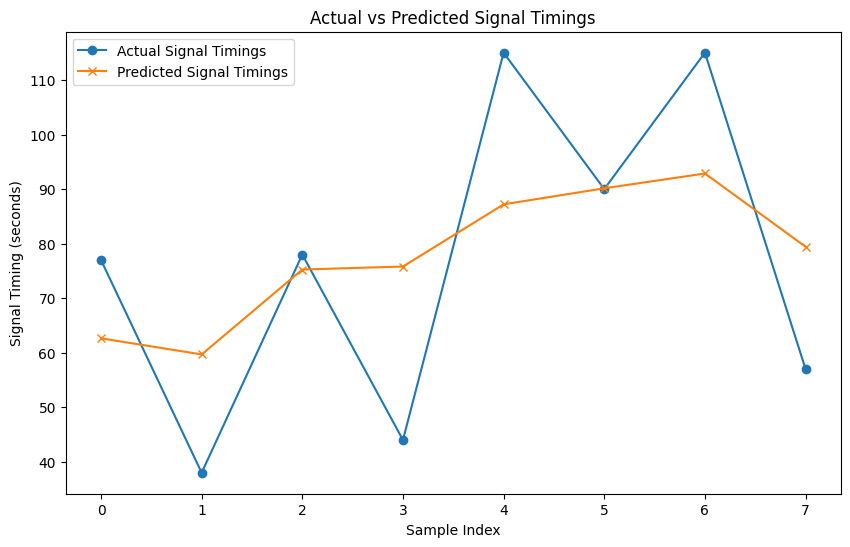

Predicted Signal Timing: 82.73 seconds
Fuel Saved: -4.55 liters
Adjusted Signal Timing for Emergency Vehicle: 82.73 seconds


C:\Users\KIIT0001\traffic-signal-detection3\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# Create a DataFrame from the provided table data
data = {
    'States/UTs': [
        'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 
        'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 
        'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 
        'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal', 'Andaman and Nicobar Islands', 'Chandigarh', 
        'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Jammu and Kashmir', 'Ladakh', 'Lakshadweep', 'Puducherry'
    ],
    '2022': [
        21249, 227, 7023, 10801, 13279, 3011, 15751, 10429, 2597, 5175, 39762, 43910, 54432, 33383, 508, 246, 133, 
        489, 11663, 6138, 23614, 211, 64105, 21619, 575, 1674, 41746, 13686, 141, 237, 196, 'NA', 5652, 6092, 374, 3, 
        1181
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Add a column for Traffic Density based on the number of deaths in road accidents
def calculate_traffic_density(deaths):
    if deaths == 'NA':
        return 'Unknown'
    deaths = int(deaths)
    if deaths <= 50:
        return 'Low'
    elif deaths <= 100:
        return 'Medium'
    else:
        return 'High'

df['Traffic Density'] = df['2022'].apply(calculate_traffic_density)

# Add a column for Lane 1 Count and Lane 2 Count for demonstration (dummy data)
df['Lane 1 Count'] = np.random.randint(10, 100, len(df))
df['Lane 2 Count'] = np.random.randint(10, 100, len(df))

# Add a column for Signal Timing (dummy data)
df['Signal Timing'] = np.random.randint(30, 120, len(df))

# Ensure all numeric columns are properly converted
df['2022'] = pd.to_numeric(df['2022'], errors='coerce')

# Handle missing values
df = df.fillna(df.mean(numeric_only=True))

# Convert categorical features (if any) to numerical using encoding
df = pd.get_dummies(df, columns=['Traffic Density'], drop_first=True)

# Select relevant columns for prediction
# Assuming 'Lane 1 Count' and 'Lane 2 Count' are features
# 'Signal Timing' is the target variable
X = df[['Lane 1 Count', 'Lane 2 Count'] + [col for col in df.columns if 'Traffic Density' in col]]
y = df['Signal Timing']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Create a pipeline for preprocessing and model training
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict signal timings on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model using mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Grid Search for hyperparameter tuning of Ridge and Lasso
param_grid = {
    'model__alpha': [0.1, 1.0, 10.0]
}

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

ridge_grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5)
ridge_grid_search.fit(X_train, y_train)
print(f"Best parameters for Ridge Regression: {ridge_grid_search.best_params_}")

lasso_grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5)
lasso_grid_search.fit(X_train, y_train)
print(f"Best parameters for Lasso Regression: {lasso_grid_search.best_params_}")

# Plot actual vs predicted signal timings
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Signal Timings', marker='o')
plt.plot(y_pred, label='Predicted Signal Timings', marker='x')
plt.title("Actual vs Predicted Signal Timings")
plt.xlabel("Sample Index")
plt.ylabel("Signal Timing (seconds)")
plt.legend()
plt.show()

# Optimization Logic - Predict Signal Timing Based on Lane Counts
def predict_signal_timing(lane_1_count, lane_2_count, traffic_density_low=0, traffic_density_medium=0):
    # Ensure the input has the correct number of features
    input_data = np.array([[lane_1_count, lane_2_count, traffic_density_low, traffic_density_medium]])
    predicted_timing = pipeline.predict(input_data)
    return predicted_timing[0]

# Example: Predict signal timing for a specific traffic condition
lane_1_count = 20  # Example lane 1 vehicle count
lane_2_count = 30  # Example lane 2 vehicle count

# Predicting with default traffic density values (not high)
predicted_signal_timing = predict_signal_timing(lane_1_count, lane_2_count)
print(f"Predicted Signal Timing: {predicted_signal_timing:.2f} seconds")

# Optimize Fuel Savings Based on Signal Timing Adjustments
def calculate_fuel_savings(idle_time_before, idle_time_after, vehicle_count):
    fuel_per_second = 0.002  # Average liters of fuel burned per second while idling
    fuel_saved = (idle_time_before - idle_time_after) * fuel_per_second * vehicle_count
    return round(fuel_saved, 2)

# Example: Calculate fuel savings
idle_time_before = 60  # Example value (before optimization)
idle_time_after = predicted_signal_timing  # After optimization

fuel_saved = calculate_fuel_savings(idle_time_before, idle_time_after, 100)  # Assume 100 vehicles
print(f"Fuel Saved: {fuel_saved} liters")

# Emergency Vehicle Prioritization Logic
def prioritize_emergency_vehicle(signal_timing, is_emergency):
    if is_emergency:
        return max(signal_timing - 10, 30)  # Give priority to emergency vehicles, set minimum of 30 seconds
    return signal_timing

# Example: Adjust signal for an emergency vehicle
# Adjust the condition based on correct one-hot encoded columns: Traffic Density_Medium and Traffic Density_High
is_emergency_medium = 'Traffic Density_Medium' in df.columns and df['Traffic Density_Medium'][0] == 1
is_emergency_high = 'Traffic Density_High' in df.columns and df['Traffic Density_High'][0] == 1
is_emergency = is_emergency_medium or is_emergency_high

adjusted_signal_timing = prioritize_emergency_vehicle(predicted_signal_timing, is_emergency)
print(f"Adjusted Signal Timing for Emergency Vehicle: {adjusted_signal_timing:.2f} seconds")

# Save the model to a file
joblib.dump(pipeline, 'traffic_signal_model.pkl')

# Load the model back (for use in future predictions)
loaded_pipeline = joblib.load('traffic_signal_model.pkl')

